In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import urllib.request
from bs4 import BeautifulSoup
#import geopandas as gpd

sns.set(color_codes=True)

In [266]:
suicide_fp = r"Suicide/suicide.csv"
suicide = pd.read_csv(suicide_fp, encoding='latin1')

# Helper Functions

In [267]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

def recalc_suicides_ratio(df):
    df['per100k'] = df.suicides_no / (df.population/100000)

In [268]:
suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [309]:
suicide = suicide.rename(columns={"gdp_for_year ($) ": "gdp_yearly", "gdp_per_capita ($)":'gdp_capita'})
#Remove 2016 as most countries do not have data for that year. 
suicide = suicide[suicide['year'] != 2016]

This next block will get the list of countries in their respective continent and then add a continent coulmn to the dataframe

In [270]:
html_doc = urllib.request.urlopen("https://www.worldatlas.com/cntycont.htm").read().decode("utf-8")
soup = BeautifulSoup(html_doc, 'html.parser')
all_continents = soup.find_all('ul')

all_continents = {"Africa" : all_continents[1].get_text().split("\n"), "Asia": all_continents[2].get_text().split("\n"), "Europe": all_continents[3].get_text().split("\n"), 
                "North America": all_continents[4].get_text().split("\n"), "Oceania": all_continents[5].get_text().split("\n"), "South America": all_continents[6].get_text().split("\n")}
for continent in all_continents.keys():
    while("" in all_continents[continent]):
        all_continents[continent].remove("")

def convert_contry_to_continent(my_country):
    for continent in all_continents.keys():
        if([country for country in all_continents[continent] if country in my_country]):
            return continent
convert_contry_to_continent("Peru")

suicide['continent'] = suicide['country'].apply(lambda x: convert_contry_to_continent(x))
suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_capita,generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Asia
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia


 # US

In [271]:
us_suicide = suicide[suicide['country'] == 'United States']
us_suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_capita,generation,continent
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation,North America
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation,North America
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers,North America
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent,North America
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,NaN,"18,120,714,000,000",60387,Millenials,North America
27216,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,NaN,"18,120,714,000,000",60387,Millenials,North America
27217,United States,2015,female,75+ years,540,11778666,4.58,United States2015,NaN,"18,120,714,000,000",60387,Silent,North America
27218,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,NaN,"18,120,714,000,000",60387,Generation Z,North America


In [276]:
us_yearly_suicide = us_suicide[['year', 'suicides_no', 'population', 'age']]
us_yearly_suicide

,year,suicides_no,population,age
26848,1985,2177,4064000,75+ years
26849,1985,5302,17971000,55-74 years
26850,1985,5134,20986000,25-34 years
26851,1985,6053,26589000,35-54 years
26852,1985,4267,19962000,15-24 years
...,...,...,...,...
27215,2015,1444,21555712,25-34 years
27216,2015,1132,21633813,15-24 years
27217,2015,540,11778666,75+ years
27218,2015,255,21273987,5-14 years


In [277]:
us_yearly_suicide = us_yearly_suicide.groupby('year').sum().reset_index()
recalc_suicides_ratio(us_yearly_suicide)
us_yearly_suicide

,year,suicides_no,population,per100k
0,1985,29446,220723000,13.340703
1,1986,30892,222953000,13.855835
2,1987,30783,225148000,13.672340
3,1988,30388,227353000,13.365999
4,1989,30218,229487000,13.167630
5,1990,30895,229952200,13.435401
6,1991,30790,232955000,13.217145
7,1992,30471,235565600,12.935250
8,1993,31084,238092300,13.055441
9,1994,31123,240614100,12.934820


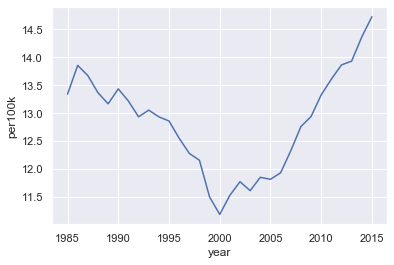

In [278]:
sns.lineplot(x = 'year', y='per100k', data=us_yearly_suicide)

In [283]:
us_yearly_age =  us_suicide[['year', 'suicides_no', 'population',  'age']]
#smooth out lines by merging male and female together
us_yearly_age = us_yearly_age.groupby(['age', 'year']).sum().reset_index()
recalc_suicides_ratio(us_yearly_age)

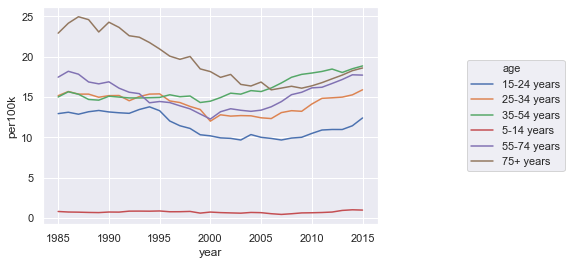

In [284]:
g=sns.lineplot(x = 'year', y='per100k', hue='age',  estimator=None, data=us_yearly_age)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [285]:
us_yearly_gender =  us_suicide[['year','suicides_no', 'population', 'age', 'sex']]
recalc_suicides_ratio(us_yearly_gender)
us_yearly_gender

C:\Users\zeusg\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,year,suicides_no,population,age,sex,per100k
26848,1985,2177,4064000,75+ years,male,53.567913
26849,1985,5302,17971000,55-74 years,male,29.503088
26850,1985,5134,20986000,25-34 years,male,24.463928
26851,1985,6053,26589000,35-54 years,male,22.765053
26852,1985,4267,19962000,15-24 years,male,21.375614
...,...,...,...,...,...,...
27215,2015,1444,21555712,25-34 years,female,6.698920
27216,2015,1132,21633813,15-24 years,female,5.232550
27217,2015,540,11778666,75+ years,female,4.584560
27218,2015,255,21273987,5-14 years,male,1.198647


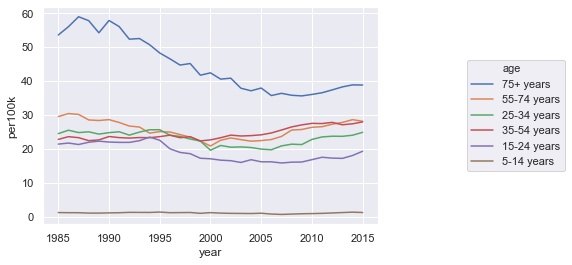

In [286]:
male = us_yearly_gender[us_yearly_gender['sex'] == 'male']
g = sns.lineplot(x = 'year', y='per100k', hue='age',  estimator=None, data=male)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

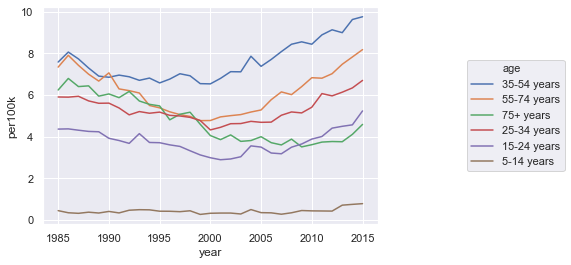

In [287]:
female = us_yearly_gender[us_yearly_gender['sex'] == 'female']
g = sns.lineplot(x = 'year', y='per100k', hue='age',  estimator=None, data=female)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [289]:
us_gender = us_suicide[['year', 'suicides_no', 'population', 'sex']]
us_gender

,year,suicides_no,population,sex
26848,1985,2177,4064000,male
26849,1985,5302,17971000,male
26850,1985,5134,20986000,male
26851,1985,6053,26589000,male
26852,1985,4267,19962000,male
...,...,...,...,...
27215,2015,1444,21555712,female
27216,2015,1132,21633813,female
27217,2015,540,11778666,female
27218,2015,255,21273987,male


In [290]:
us_gender = us_gender.groupby(['sex','year']).sum().reset_index()
recalc_suicides_ratio(us_gender)

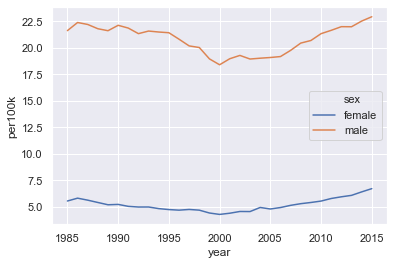

In [291]:
sns.lineplot(x = 'year', y='per100k', hue='sex',  estimator=None, data=us_gender)

In [292]:
us_suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_capita,generation,continent
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation,North America
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation,North America
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers,North America
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent,North America
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,NaN,"18,120,714,000,000",60387,Millenials,North America
27216,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,NaN,"18,120,714,000,000",60387,Millenials,North America
27217,United States,2015,female,75+ years,540,11778666,4.58,United States2015,NaN,"18,120,714,000,000",60387,Silent,North America
27218,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,NaN,"18,120,714,000,000",60387,Generation Z,North America


In [293]:
us_gdp = us_suicide[['gdp_capita', 'suicides_no', 'population', 'year']]
us_gdp = us_gdp.groupby(['year','gdp_capita']).sum().reset_index()
recalc_suicides_ratio(us_gdp)
us_gdp

,year,gdp_capita,suicides_no,population,per100k
0,1985,19693,29446,220723000,13.340703
1,1986,20588,30892,222953000,13.855835
2,1987,21631,30783,225148000,13.672340
3,1988,23103,30388,227353000,13.365999
4,1989,24654,30218,229487000,13.167630
5,1990,26004,30895,229952200,13.435401
6,1991,26503,30790,232955000,13.217145
7,1992,27760,30471,235565600,12.935250
8,1993,28891,31084,238092300,13.055441
9,1994,30375,31123,240614100,12.934820


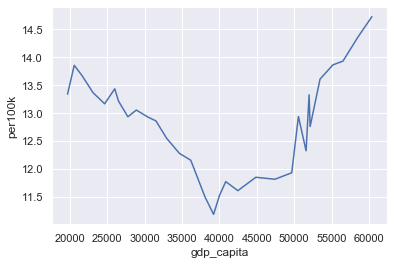

In [294]:
sns.lineplot(x = 'gdp_capita', y='per100k', estimator=None, data=us_gdp)
#sns.lineplot(x = 'year', y='gdp_capita',  estimator=None, data=us_gdp)

# By Continent

In [311]:
suicide_by_continent = suicide[['continent', 'country','suicides_no', 'population', 'year']]
#NOTE This give me the avg suicide rate per 100k in the continent this does NOT give me the true number
suicide_by_continent = suicide_by_continent.groupby(['continent', 'year']).sum().reset_index()
recalc_suicides_ratio(suicide_by_continent)
suicide_by_continent

,continent,year,suicides_no,population,per100k
0,Africa,1985,112,940700,11.906027
1,Africa,1986,29,955500,3.035060
2,Africa,1987,143,969600,14.748350
3,Africa,1988,167,925000,18.054054
4,Africa,1989,144,932900,15.435738
...,...,...,...,...,...
181,South America,2011,18340,300472124,6.103728
182,South America,2012,19692,306993507,6.414468
183,South America,2013,19192,310288235,6.185217
184,South America,2014,19609,312838861,6.268083


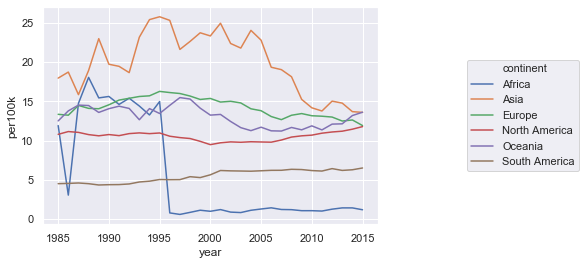

In [312]:
g = sns.lineplot(x= 'year', y='per100k', hue='continent', data=suicide_by_continent)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

,continent,year,suicides_no,population,per100k
62,Europe,1985,34098,255560980,13.342412
63,Europe,1986,34451,260436630,13.228170
64,Europe,1987,46892,323988863,14.473337
65,Europe,1988,45848,325166171,14.099868
66,Europe,1989,48865,347701565,14.053719
67,Europe,1990,71294,489804821,14.555594
68,Europe,1991,76071,501870722,15.157489
69,Europe,1992,78626,511017720,15.386159
70,Europe,1993,79391,508382523,15.616390
71,Europe,1994,81572,519543510,15.700706


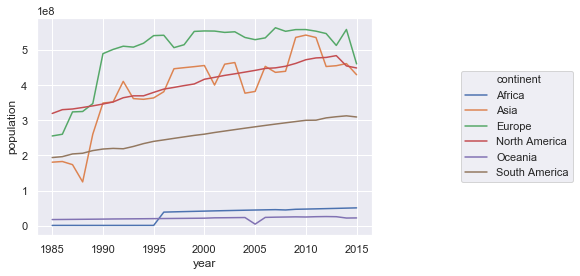

In [317]:
#Checking the data makes sense: 
g = sns.lineplot(x= 'year', y='population', hue='continent', data=suicide_by_continent)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

suicide_by_continent[suicide_by_continent['continent'] == 'Europe']

In [319]:
suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_capita,generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Asia
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia


In [332]:
africa_income = suicide[suicide['continent'] == 'Africa']
africa_income = africa_income[['country', 'year', 'gdp_capita']]
africa_income = africa_income.groupby(['year', 'country']).mean().reset_index()
africa_income

,year,country,gdp_capita
0,1985,Mauritius,1223
1,1985,Seychelles,2947
2,1986,Mauritius,1636
3,1986,Seychelles,3621
4,1987,Mauritius,2073
...,...,...,...
64,2014,Seychelles,16018
65,2014,South Africa,7174
66,2015,Mauritius,10125
67,2015,Seychelles,16005


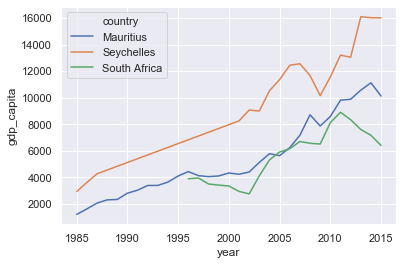

In [334]:
sns.lineplot(x='year', y = 'gdp_capita', hue='country', data=africa_income)

In [339]:
world_income = suicide[['continent', 'year', 'gdp_capita']]
world_income = world_income.groupby(['year', 'continent']).mean().reset_index()
world_income


,year,continent,gdp_capita
0,1985,Africa,2085.000000
1,1985,Asia,7675.142857
2,1985,Europe,7883.285714
3,1985,North America,6392.666667
4,1985,Oceania,10310.000000
...,...,...,...
181,2015,Asia,27690.100000
182,2015,Europe,33003.100000
183,2015,North America,14588.444444
184,2015,Oceania,60656.000000


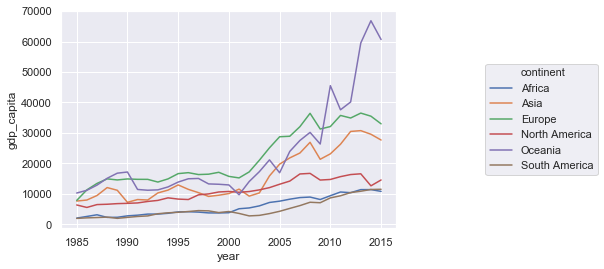

In [340]:
g = sns.lineplot(x='year', y = 'gdp_capita', hue='continent', data=world_income)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Today 

In [349]:
this_year = suicide[suicide['year'] ==  2015]
this_year = this_year[['country','suicides_no', 'population', 'gdp_capita']]
this_year = this_year.groupby(['country']).sum().reset_index()
recalc_suicides_ratio(this_year)
this_year = this_year.sort_values(by=['per100k'])
this_year

,country,suicides_no,population,gdp_capita,per100k
21,Grenada,0,96892,123480,0.000000
51,South Africa,482,49627460,76836,0.971236
0,Antigua and Barbuda,1,91889,178236,1.088270
56,Turkey,1532,71880464,143532,2.131316
2,Armenia,74,2795335,45300,2.647268
...,...,...,...,...,...
23,Hungary,1868,9389519,157044,19.894523
30,Latvia,387,1875522,172584,20.634255
50,Slovenia,422,1954632,264432,21.589742
43,Republic of Korea,13510,48671752,340920,27.757374


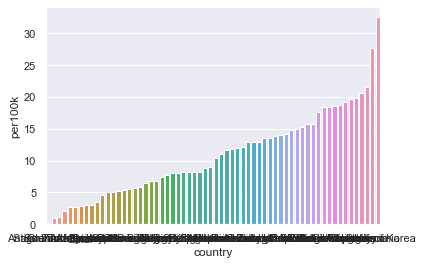

In [357]:
ax = sns.barplot(x='country', y='per100k', data=this_year)


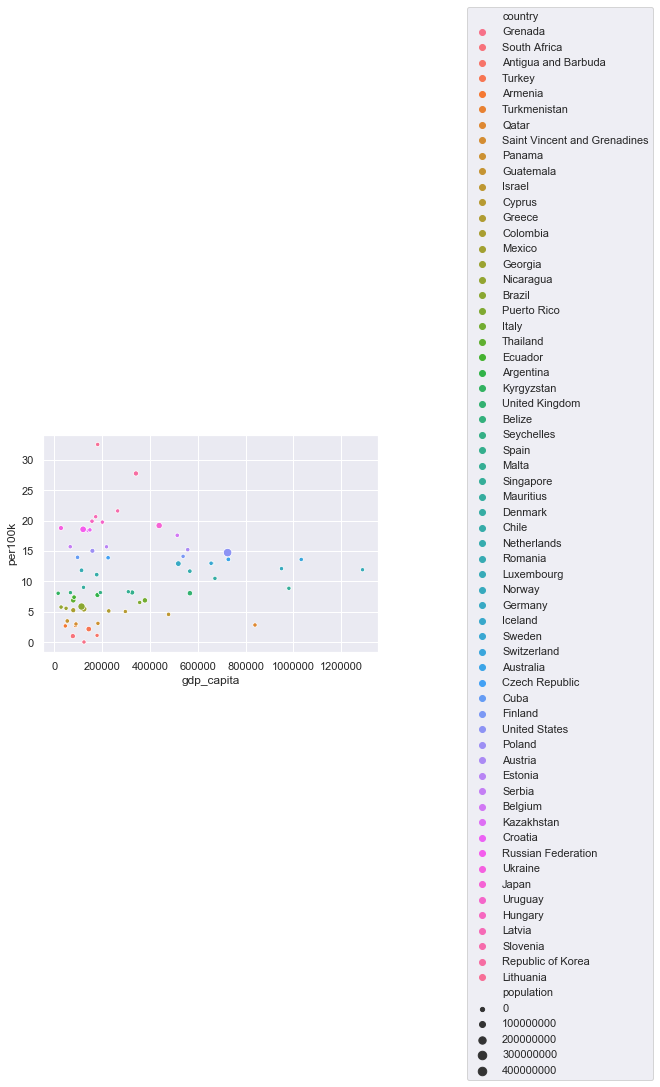

In [362]:
g = sns.scatterplot(x='gdp_capita', y='per100k', hue = 'country', size = 'population', data=this_year)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)